<a href="https://colab.research.google.com/github/mohammadbadi/CrimeAnalytics_Clustering/blob/main/Code%20Sections/5.4.1%20Data%20Reduction%20and%20Projection%20Steps%20ABCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **5.4	Data Reduction and Projection - a)	Feature Engineering, b) EDA, c) Feature Engineering & d) Data Reduction**

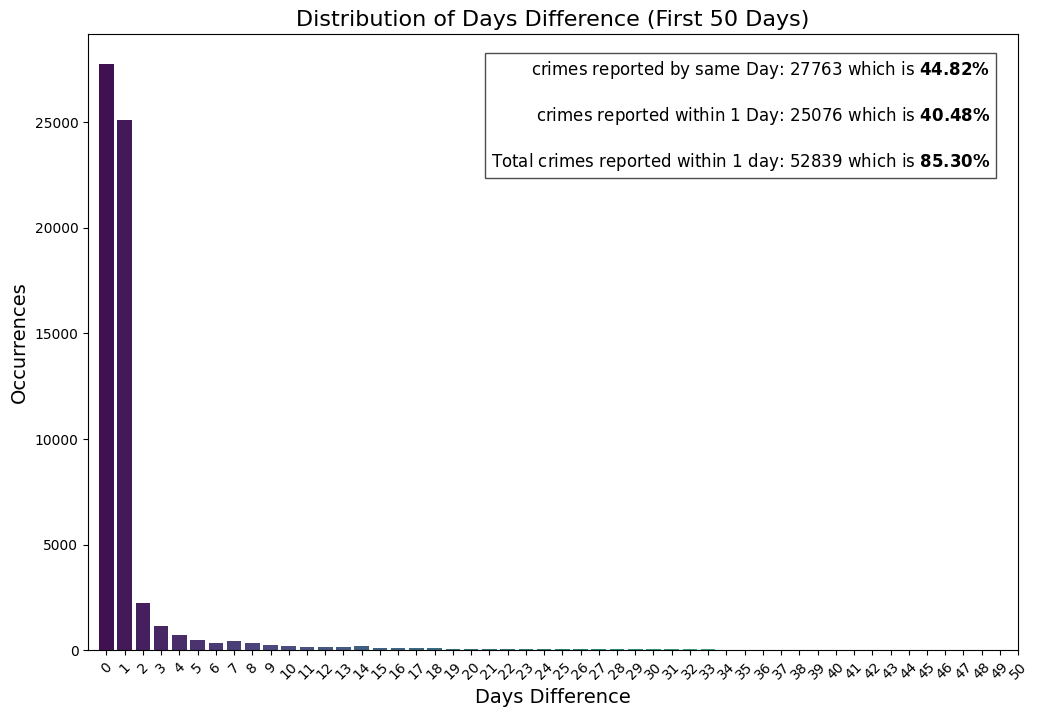

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import warnings                                                                   # Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap
from IPython.display import display, HTML
from google.colab import files

print("\n\n")
warnings.filterwarnings("ignore", category=DeprecationWarning)                    # Ignore Deprecation Warnings
warnings.filterwarnings("ignore", category=FutureWarning)                         # Ignore future warnings

url = "https://raw.githubusercontent.com/mohammadbadi/CrimeAnalytics_Clustering/refs/heads/main/Output_CSV/Cleaned_Data.csv"    # Read the data from CSV file
df = pd.read_csv(url, parse_dates=['REPORT_DATE', 'OCC_DATE'], low_memory=False)

df['DAYS_DIFFERENCE'] = (df['REPORT_DATE'] - df['OCC_DATE']).dt.days              # Calculate the difference in days between REPORT_DATE and OCC_DATE
df = df[(df['DAYS_DIFFERENCE'] >= 0) & (df['DAYS_DIFFERENCE'] <= 365)]            # Filter out invalid values (0 to 365 days)
day_diff_counts = df['DAYS_DIFFERENCE'].value_counts().reset_index()              # Count occurrences of each 'DAYS_DIFFERENCE'
day_diff_counts.columns = ['Day #', 'Reported number']
day_diff_counts = day_diff_counts.sort_values(by='Day #')

days_range = pd.DataFrame({'Day #': range(0, 90)})                                # Create a DataFrame for days 0 to 89 (90 days total so they can be arranged in 30 rows x 3 columns)
table_df = pd.merge(days_range, day_diff_counts, on='Day #', how='left')
table_df['Reported number'] = table_df['Reported number'].fillna(0).astype(int)

total_incidents = table_df['Reported number'].sum()                               # Calculate totals and percentages
table_df['% Report'] = table_df['Reported number'] / total_incidents * 100
table_df['Total reported until now'] = table_df['Reported number'].cumsum()
table_df['Total % Reported'] = table_df['Total reported until now'] / total_incidents * 100

table_df['Reported number'] = table_df['Reported number'].map(lambda x: f"{x:>10d}")    # Format numeric columns with right-justification
table_df['% Report'] = table_df['% Report'].map(lambda x: f"{x:>6.2f}%")
table_df['Total reported until now'] = table_df['Total reported until now'].map(lambda x: f"{x:>10d}")
table_df['Total % Reported'] = table_df['Total % Reported'].map(lambda x: f"{x:>6.2f}%")

n_cols = 3                                                                        # Reshape the DataFrame into a grid with 3 columns and 30 rows.
n_rows = len(table_df) // n_cols                                                  # Should be 30 rows if table_df has 90 rows

records = table_df.to_dict('records')
grid = []
for i in range(n_rows):
    row_records = []
    for j in range(n_cols):
        idx = j * n_rows + i
        row_records.append(records[idx])
    grid.append(row_records)

                                                                                  # Build the HTML table.
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
  <thead>
    <tr>
      <th colspan="15" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white; padding: 8px;">
        Distribution of Reporting Delays (30 rows x 3 columns)
      </th>
    </tr>
    <tr style='background-color: #4CAF50; color: white;'>
      <th><strong>Day #</strong></th>
      <th>Reported number</th>
      <th>% Report</th>
      <th>Total reported until now</th>
      <th>Total % Reported</th>
      <th style='border-left: 4px solid #dddddd;'><strong>Day #</strong></th>
      <th>Reported number</th>
      <th>% Report</th>
      <th>Total reported until now</th>
      <th>Total % Reported</th>
      <th style='border-left: 4px solid #dddddd;'><strong>Day #</strong></th>
      <th>Reported number</th>
      <th>% Report</th>
      <th>Total reported until now</th>
      <th>Total % Reported</th>
    </tr>
  </thead>
  <tbody>
"""

for row in grid:
    html_table += "<tr>"
    for j, record in enumerate(row):
        if j > 0:                                                                 # For the Day # cell, add bold formatting.
            day_style = "border: 1px solid #dddddd; padding: 8px; text-align: right; border-left: 4px solid #dddddd; "
        else:
            day_style = "border: 1px solid #dddddd; padding: 8px; text-align: right; "
        html_table += f"<td style='{day_style}'><strong>{record['Day #']}</strong></td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['Reported number']}</td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['% Report']}</td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['Total reported until now']}</td>"
        html_table += f"<td style='border: 1px solid #dddddd; padding: 8px; text-align: right;'>{record['Total % Reported']}</td>"
    html_table += "</tr>"
html_table += """
  </tbody>
</table>
"""

display(HTML(html_table))


day_diff_counts = df['DAYS_DIFFERENCE'].value_counts().reset_index()              # Count occurrences of each 'DAYS_DIFFERENCE'
day_diff_counts.columns = ['Days Difference', 'Occurrences']
day_diff_counts = day_diff_counts.sort_values(by='Days Difference')

day_diff_filtered = day_diff_counts[day_diff_counts['Days Difference'] <= 50].copy()  # Filter for days <= 50 for the first chart

fig, ax = plt.subplots(figsize=(12, 8))                                           #First Chart: Bar Plot (First 50 Days)
sns.barplot(x='Days Difference', y='Occurrences', data=day_diff_filtered, palette='viridis', ax=ax)
ax.set_title('Distribution of Days Difference (First 50 Days)', fontsize=16)
ax.set_xlabel('Days Difference', fontsize=14)
ax.set_ylabel('Occurrences', fontsize=14)
ax.set_xlim(-1, 50)
ax.set_xticks(day_diff_filtered["Days Difference"])                               # Set tick positions explicitly
ax.set_xticklabels(day_diff_filtered["Days Difference"], rotation=45)             # Then set tick labels

total_incidents = day_diff_counts['Occurrences'].sum()                            # Compute totals for day 0 and day 1 based on the complete dataset
zero_day_count = (day_diff_counts[day_diff_counts['Days Difference'] == 0]['Occurrences']
                  .sum() if not day_diff_counts[day_diff_counts['Days Difference'] == 0].empty else 0)
one_day_count = (day_diff_counts[day_diff_counts['Days Difference'] == 1]['Occurrences']
                 .sum() if not day_diff_counts[day_diff_counts['Days Difference'] == 1].empty else 0)
total_zero_one = zero_day_count + one_day_count

percent_zero = (zero_day_count / total_incidents) * 100 if total_incidents > 0 else 0   # Calculate percentages
percent_one = (one_day_count / total_incidents) * 100 if total_incidents > 0 else 0
percent_total = (total_zero_one / total_incidents) * 100 if total_incidents > 0 else 0

explanation_text = (                                                              # Explanation text with three lines; construct the mathtext for the percentages separately so that only those values are bold.
    f"crimes reported by same Day: {zero_day_count} which is " +
    "$\\mathbf{" + f"{percent_zero:.2f}" + "\\%}$" + "\n\n" +
    f"crimes reported within 1 Day: {one_day_count} which is " +
    "$\\mathbf{" + f"{percent_one:.2f}" + "\\%}$" + "\n\n" +
    f"Total crimes reported within 1 day: {total_zero_one} which is " +
    "$\\mathbf{" + f"{percent_total:.2f}" + "\\%}$"
)

ax.text(0.97, 0.96, explanation_text, transform=ax.transAxes, ha='right', va='top', # Place the explanation text inside the graph at the top-right using axis coordinates
        fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

bar_plot_filename = '/content/5.4 EDA_First_50days.png'                                # Save and download the chart
plt.savefig(bar_plot_filename, bbox_inches='tight', dpi=300)
plt.show()
files.download(bar_plot_filename)

print("\n\n")
Data_Processing_df = pd.read_csv(url, low_memory=False).copy()

html_output_filename = "/content/5.4 Data Reduction and Projection.html"

steps_summary = []                                                                # Store processing steps summary

before_step_1 = Data_Processing_df.shape[0]                                       # Step 1: Dataset Loading
before_columns = Data_Processing_df.shape[1]                                      # Columns at the time of loading dataset
steps_summary.append({
    "Step Taken": "Step 1: Load Dataset",
    "Before Action": before_step_1,
    "Affected by Action": "",
    "After Action": before_step_1,
    "Unit": "Rows"
})

current_rows = Data_Processing_df.shape[0]                                        # Use current row count after loading as reference for subsequent steps

Data_Processing_df['REPORT_DATETIME'] = pd.to_datetime(Data_Processing_df['REPORT_DATE']) + pd.to_timedelta(Data_Processing_df['REPORT_HOUR'], unit='h')    # Step 2: Create datetime columns for 'REPORT_DATETIME' and 'OCC_DATETIME'
Data_Processing_df['OCC_DATETIME'] = pd.to_datetime(Data_Processing_df['OCC_DATE']) + pd.to_timedelta(Data_Processing_df['OCC_HOUR'], unit='h')

rows_after_datetime = Data_Processing_df.shape[0]                                 # The row count remains unchanged after creating datetime columns
steps_summary.append({
    "Step Taken": "Step 2: Feature Engineering - Join the Date & Time",
    "Before Action": current_rows,
    "Affected by Action": "New Columns Added",
    "After Action": rows_after_datetime,
    "Unit": "Rows"
})

reporting_timedelta = Data_Processing_df['REPORT_DATETIME'] - Data_Processing_df['OCC_DATETIME']  # Step 3: Calculate the reporting delay (days + hours only)
Data_Processing_df['reporting_delay_days'] = reporting_timedelta.dt.days
Data_Processing_df['reporting_delay_hours'] = (reporting_timedelta.dt.seconds // 3600)  # Convert seconds to full hours

rows_after_delay_calc = Data_Processing_df.shape[0]                               # The row count remains unchanged after calculating delays
steps_summary.append({
    "Step Taken": "Step 3: Feature Engineering: Compute Reporting Delay in Days & Hours",
    "Before Action": rows_after_datetime,
    "Affected by Action": "New Columns Added",
    "After Action": rows_after_delay_calc,
    "Unit": "Rows"
})

before_delay_filter = Data_Processing_df.shape[0]                                 # Step 4: Filter records with reporting delays between 0 to 60 days
Data_Processing_df = Data_Processing_df[
    (Data_Processing_df['reporting_delay_days'] >= 0) &
    (Data_Processing_df['reporting_delay_days'] <= 1)
].copy()
after_delay_filter = Data_Processing_df.shape[0]
delay_filtered_rows = before_delay_filter - after_delay_filter

steps_summary.append({
    "Step Taken": "Step 4: Only Keep Complaints with 0-60 Days Delay",
    "Before Action": before_delay_filter,
    "Affected by Action": delay_filtered_rows,
    "After Action": after_delay_filter,
    "Unit": "Rows"
})

columns_to_drop = ['REPORT_YEAR', 'REPORT_MONTH', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', # Step 5: Drop unnecessary columns
                   'HOOD_140', 'NEIGHBOURHOOD_140', 'UCR_CODE', 'UCR_EXT', 'OFFENCE', 'MCI_CATEGORY',
                   'REPORT_DATE', 'OCC_DATE', 'REPORT_HOUR', 'REPORT_DATETIME']
columns_before_drop = Data_Processing_df.shape[1]

dropped_column_names = [col for col in columns_to_drop if col in Data_Processing_df.columns]  # Store column names before dropping

Data_Processing_df = Data_Processing_df.drop(columns=dropped_column_names).copy() # Drop columns
columns_after_drop = Data_Processing_df.shape[1]
dropped_columns = columns_before_drop - columns_after_drop

steps_summary.append({
    "Step Taken": "Step 5: Dropped Unnecessary Columns",
    "Before Action": columns_before_drop,
    "Affected by Action": dropped_columns,
    "After Action": columns_after_drop,
    "Unit": "Columns"
})

Data_Processing_df.to_csv('Final_Data.csv', index=False)                          # Save the final data to a CSV file

steps_summary.append({                                                            # Step 8: Summary - Rows Affected
    "Step Taken": "Rows Affected in <strong>5.4 Data Reduction and Projection</strong>",
    "Before Action": f"Initial Load:<br><strong>{before_step_1}</strong>",
    "Affected by Action": f"Rows Filtered:<br><strong>{before_step_1 - after_delay_filter}</strong>",
    "After Action": f"Final Count: <br><strong>{after_delay_filter}</strong>",
    "Unit": "Rows"
})

steps_summary.append({                                                            # Step 9: Summary - Columns Affected
    "Step Taken": "Columns Affected in <strong>5.4 Data Reduction and Projection</strong>",
    "Before Action": f"Initial Load:<br><strong>{before_columns}</strong>",
    "Affected by Action": f"Columns Dropped:<br><strong>{dropped_columns}</strong>",
    "After Action": f"Final Count: <br><strong>{columns_after_drop}</strong>",
    "Unit": "Columns"
})
                                                                                  # Create HTML Table with styling
html_table = """
<table style='border-collapse: collapse; width: 100%; font-size: 18px;'>
    <thead style='background-color: #4CAF50; color: white;'>
        <tr>
            <th colspan="5" style="text-align: center; font-size: 24px; background-color: #2f4f4f; color: white;">
                <strong>5.4 Data Reduction and Projection</strong>
            </th>
        </tr>
        <tr>
            <th>Step Taken</th>
            <th>Before Action</th>
            <th>Affected by Action</th>
            <th>After Action</th>
            <th>Unit</th>
        </tr>
    </thead>
    <tbody>
"""

for step in steps_summary:
    html_table += f"""
    <tr style='border: 1px solid #dddddd;'>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Step Taken']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Before Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Affected by Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['After Action']}</td>
        <td style='border: 1px solid #dddddd; padding: 8px;'>{step['Unit']}</td>
    </tr>
    """
html_table += "</tbody></table>"

                                                                                  # Final message about saved data
final_message = """
<div style="font-size: 18px; color: #333; font-weight: bold; padding: 10px;">
    The final data after Data Reduction and Projection has been saved as <span style="color: blue;">'Final_Data.csv'</span> for further analysis.
</div>
"""

display(HTML(html_table))                                                         # Display the tables
display(HTML(final_message))                                                      # Display the final message

with open(html_output_filename, 'w', encoding='utf-8') as f:
    f.write(html_table)
    f.write(final_message)

files.download(html_output_filename)                                              # Download HTML File
files.download('Final_Data.csv')                                                  # Download CSV File
print("\n\n")